#### https://lwmachinelearning.wordpress.com/portfolio/customer-churn-analysis/

# Starting Project and Cleaning the Data

#### load libraries

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

#### load and read the data:

In [325]:
file = '/users/parinyaduangklang/Documents/test data sci/Data Analyst Interview data - Telco.csv'
dataset = pd.read_csv(file, na_values=[" "])

In [326]:
dataset.head().T #Transposed for easier visualization

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [241]:
dataset.shape

(7043, 21)

#### changing the SeniorCitizen to categorical

In [242]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) #Changing from int to categorical
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

#### deleted the custumerID since it doesn’t help to predict if the client is going to leave.

In [243]:
del dataset["customerID"] # Deleting the custumerID column

#### check for NA values and clean my data.

In [244]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### drop the few NA rows data has null values:

In [245]:
dataset = dataset.dropna()

# Initial Analysis

#### split the dataset into numeric and objects to facilitate the analysis:

In [246]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [247]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [248]:
asr=dataset.groupby('Churn').size() # groupby ใช้ split data into group
asr

Churn
No     5163
Yes    1869
dtype: int64

# 1

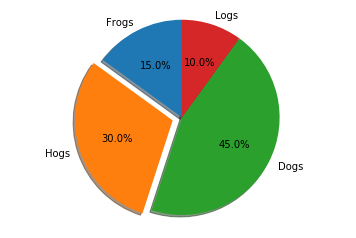

In [249]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

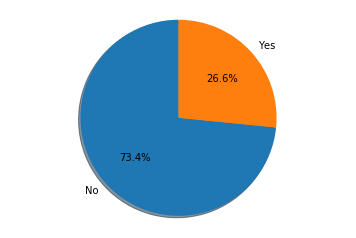

In [250]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No', 'Yes'
sizes = [asr[0],asr[1]]
explode = (0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 2

In [251]:
np.median(dataset["tenure"])

29.0

# 3

In [252]:
fc  = dataset[(dataset.gender == 'Female') & (dataset.SeniorCitizen==1)]
fc_Fiber = fc[fc.InternetService == 'Fiber optic']
fc_DSL = fc[fc.InternetService == 'DSL']
fc_Fiber.shape

(424, 20)

In [253]:
fc_DSL.shape[0]

123

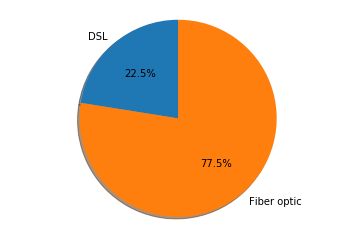

In [254]:
labels = 'DSL', 'Fiber optic'
sizes = [fc_DSL.shape[0],fc_Fiber.shape[0]]
explode = (0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# 4

In [255]:
dataset[(dataset.InternetService == 'Fiber optic') & (dataset.PhoneService=='No')].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [256]:
dataset[(dataset.InternetService == 'Fiber optic') & (dataset.PhoneService=='No')].describe()
# dataset[(dataset.InternetService == 'Fiber optic') & (dataset.PhoneService=='No')].value_counts()

,tenure,MonthlyCharges,TotalCharges
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [329]:
data4 = dataset[['InternetService', 'PhoneService']]
# data4
data4[dataset.InternetService == 'Fiber optic'].describe()
data4[dataset.InternetService == 'Fiber optic'].volue_counts()

AttributeError: 'DataFrame' object has no attribute 'volue_counts'

# 5

In [258]:
dataset_5 = dataset.drop(["gender","SeniorCitizen","Partner",
                        "MonthlyCharges","TotalCharges","Churn","tenure"], axis = 1)
dataset_5
# data5 = dataset_5[dataset_5.TechSupport.isin(['No','No internet service'])]
data5 = dataset_5[dataset_5.TechSupport.isin(['Yes'])]
data5.head()


,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
3,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
8,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
14,No,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check
15,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)
18,Yes,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic)


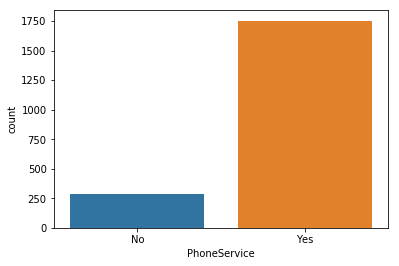

In [259]:
sns.countplot(x="PhoneService", data=data5)

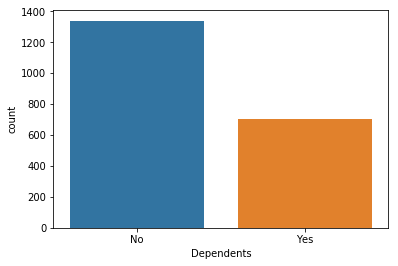

In [260]:
sns.countplot(x="Dependents", data=data5)

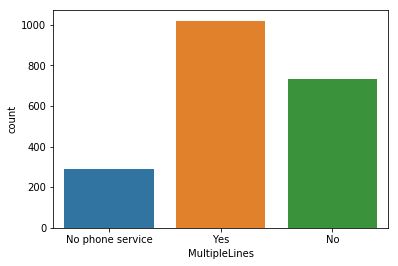

In [261]:
sns.countplot(x="MultipleLines", data=data5)

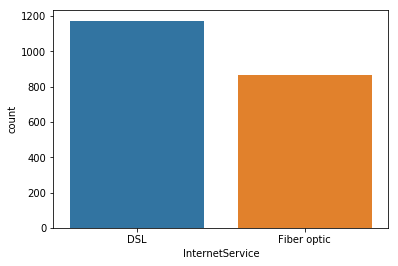

In [262]:
hisIS = sns.countplot(x="InternetService", data=data5)
hisIS

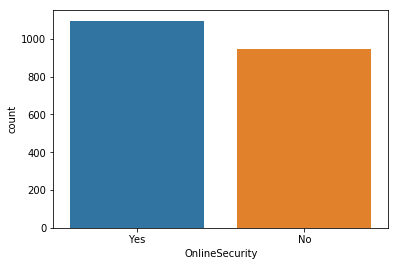

In [263]:
sns.countplot(x="OnlineSecurity", data=data5)

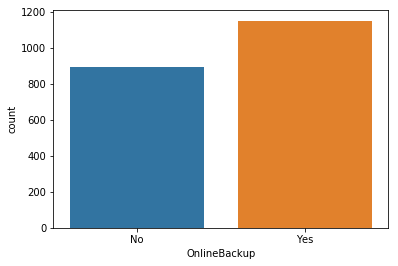

In [264]:
sns.countplot(x="OnlineBackup", data=data5)

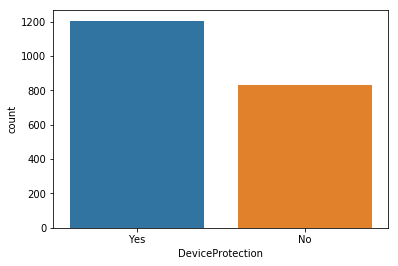

In [265]:
sns.countplot(x="DeviceProtection", data=data5)

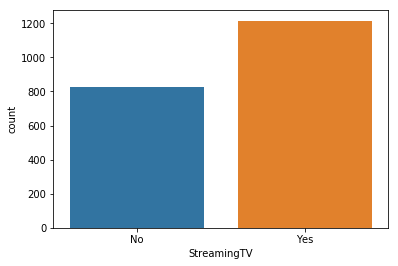

In [266]:
sns.countplot(x="StreamingTV", data=data5)

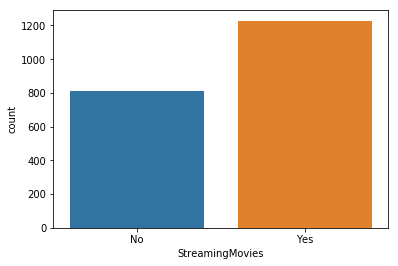

In [267]:
sns.countplot(x="StreamingMovies", data=data5)

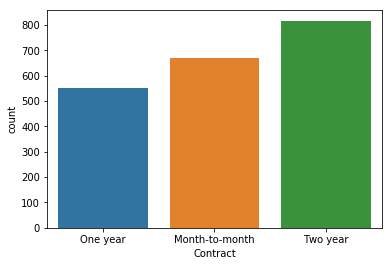

In [268]:
sns.countplot(x="Contract", data=data5)

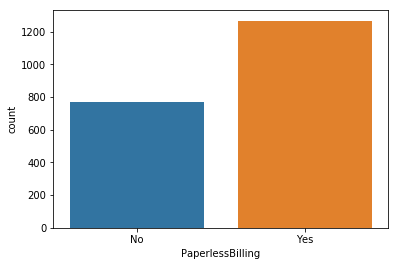

In [269]:
sns.countplot(x="PaperlessBilling", data=data5)

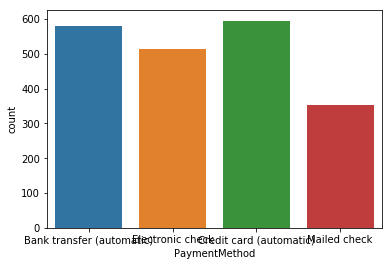

In [270]:

sns.countplot(x="PaymentMethod", data=data5)

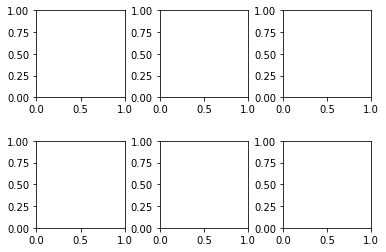

In [271]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
#     ax.text(0.5, 0.5, str((2, 3, i)),
#            fontsize=10, ha='center')

In [272]:
numerics = ['float64', 'int64']
numeric_ds_5 = dataset.select_dtypes(include=numerics)
objects_ds_5 = dataset.select_dtypes(exclude=numerics)

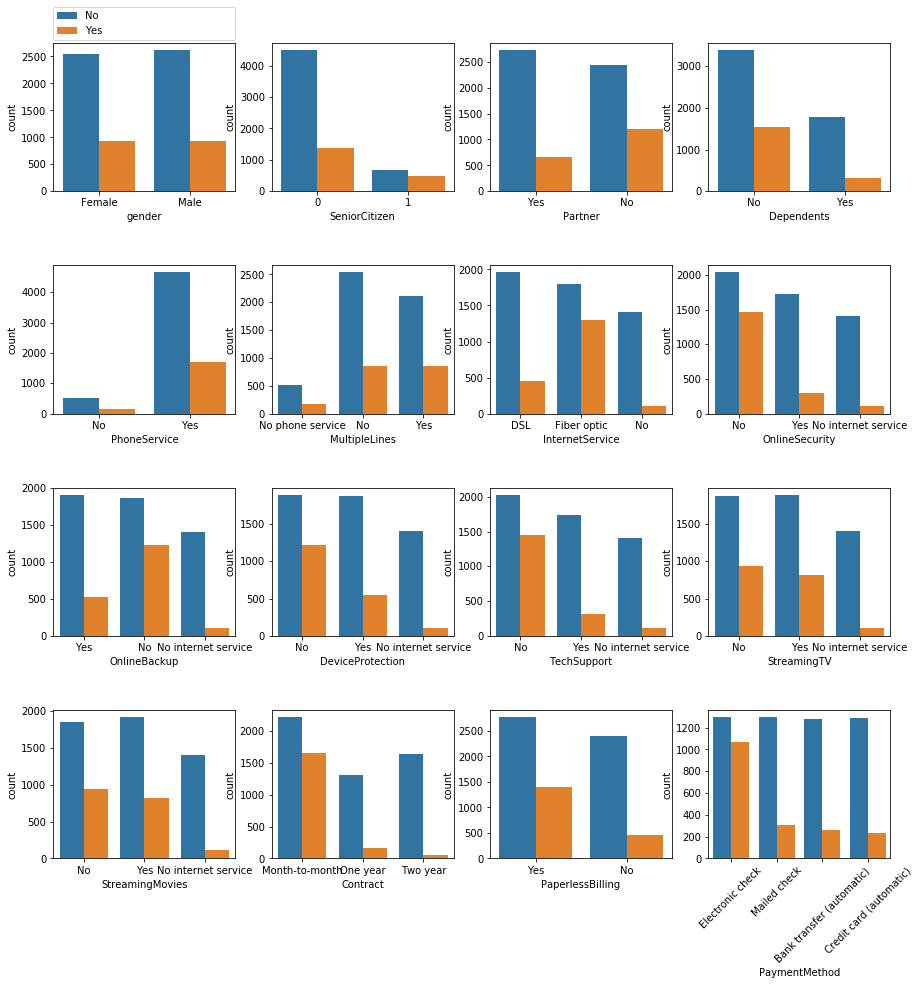

In [273]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds_5.iloc[:,i], hue=objects_ds_5["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

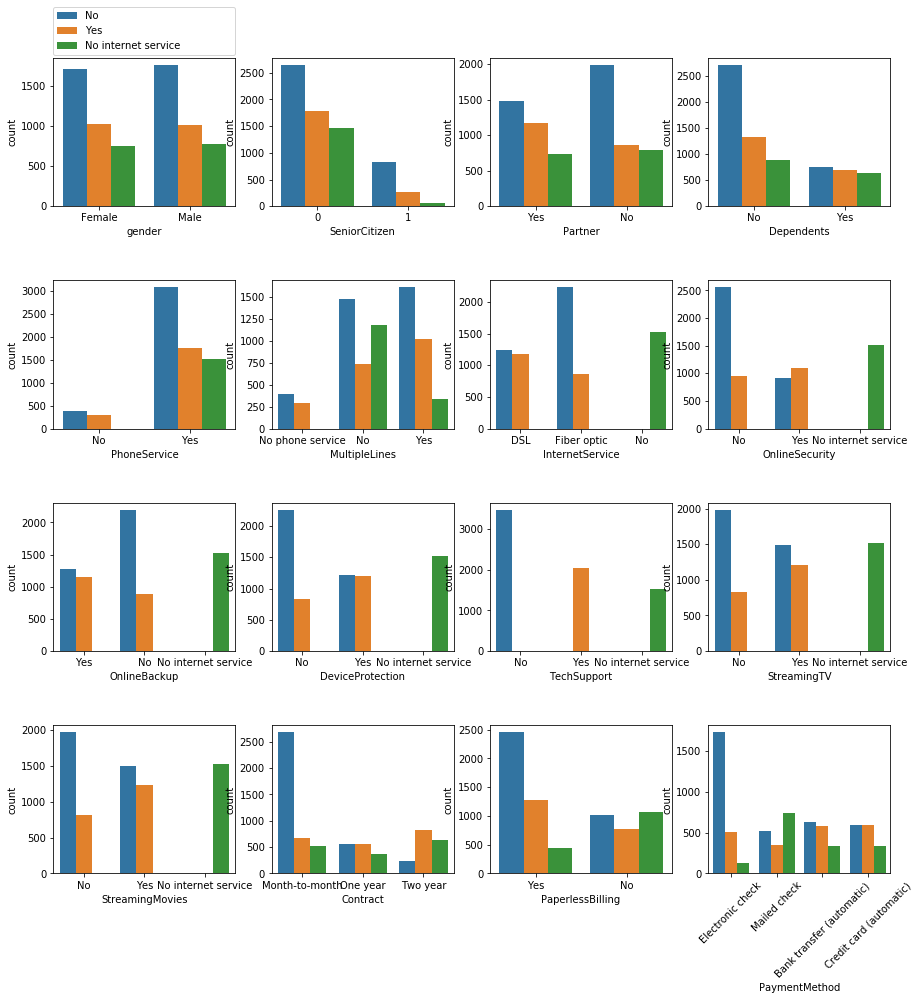

In [274]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds_5.iloc[:,i], hue=objects_ds_5["TechSupport"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

# 9

In [275]:
dataset[(dataset.InternetService == 'Fiber optic') & (dataset.Churn=='Yes')].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
26,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes


In [276]:
print(dataset[dataset['Churn']=='Yes']['Dependents'].value_counts())
print(dataset[dataset['Churn']=='Yes']['PhoneService'].value_counts())
print(dataset[dataset['Churn']=='Yes']['MultipleLines'].value_counts())
print(dataset[dataset['Churn']=='Yes']['InternetService'].value_counts())
print(dataset[dataset['Churn']=='Yes']['OnlineSecurity'].value_counts())
print(dataset[dataset['Churn']=='Yes']['OnlineBackup'].value_counts())
print(dataset[dataset['Churn']=='Yes']['DeviceProtection'].value_counts())
print(dataset[dataset['Churn']=='Yes']['TechSupport'].value_counts())
print(dataset[dataset['Churn']=='Yes']['StreamingTV'].value_counts())

print(dataset[dataset['Churn']=='Yes']['StreamingMovies'].value_counts())
print(dataset[dataset['Churn']=='Yes']['Contract'].value_counts())
print(dataset[dataset['Churn']=='Yes']['PaperlessBilling'].value_counts())
print(dataset[dataset['Churn']=='Yes']['PaymentMethod'].value_counts())


No     1543
Yes     326
Name: Dependents, dtype: int64
Yes    1699
No      170
Name: PhoneService, dtype: int64
Yes                 850
No                  849
No phone service    170
Name: MultipleLines, dtype: int64
Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64
No                     1461
Yes                     295
No internet service     113
Name: OnlineSecurity, dtype: int64
No                     1233
Yes                     523
No internet service     113
Name: OnlineBackup, dtype: int64
No                     1211
Yes                     545
No internet service     113
Name: DeviceProtection, dtype: int64
No                     1446
Yes                     310
No internet service     113
Name: TechSupport, dtype: int64
No                     942
Yes                    814
No internet service    113
Name: StreamingTV, dtype: int64
No                     938
Yes                    818
No internet service    113
Name: StreamingMovi

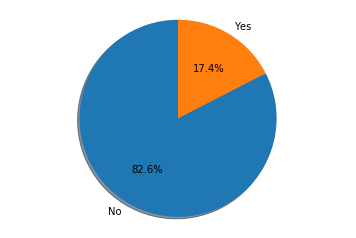

In [277]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'No', 'Yes'
sizes = [de[0],de[1]]
explode = (0,0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [278]:
de=dataset[dataset['Churn']=='Yes']['Dependents'].value_counts()
de
# print(dataset[dataset['Churn']=='Yes']['PhoneService'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['MultipleLines'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['InternetService'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['OnlineSecurity'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['OnlineBackup'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['DeviceProtection'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['TechSupport'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['StreamingTV'].value_counts())

# print(dataset[dataset['Churn']=='Yes']['StreamingMovies'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['Contract'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['PaperlessBilling'].value_counts())
# print(dataset[dataset['Churn']=='Yes']['PaymentMethod'].value_counts())


No     1543
Yes     326
Name: Dependents, dtype: int64

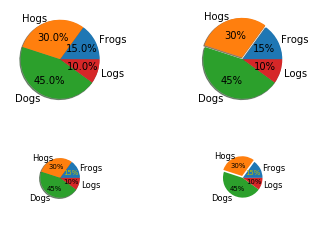

In [279]:
"""
Make a pie charts of varying size - see
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.pie for the docstring.

This example shows a basic pie charts with labels optional features,
like autolabeling the percentage, offsetting a slice with "explode"
and adding a shadow, in different sizes.

"""
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Some data

labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
fracs = [15, 30, 45, 10]

explode = (0, 0.05, 0, 0)

# Make square figures and axes

the_grid = GridSpec(2, 2)

plt.subplot(the_grid[0, 0], aspect=1)

plt.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)

plt.subplot(the_grid[0, 1], aspect=1)

plt.pie(fracs, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)

plt.subplot(the_grid[1, 0], aspect=1)

patches, texts, autotexts = plt.pie(fracs, labels=labels,
                                    autopct='%.0f%%',
                                    shadow=True, radius=0.5)

# Make the labels on the small plot easier to read.
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.subplot(the_grid[1, 1], aspect=1)

# Turn off shadow for tiny plot with exploded slice.
patches, texts, autotexts = plt.pie(fracs, explode=explode,
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=0.5)
for t in texts:
    t.set_size('smaller')
for t in autotexts:
    t.set_size('x-small')
autotexts[0].set_color('y')

plt.show()


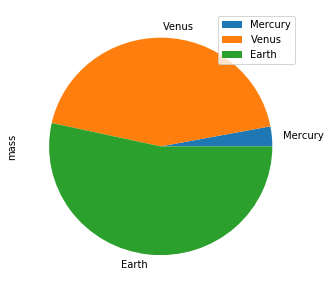

In [280]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                  'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))


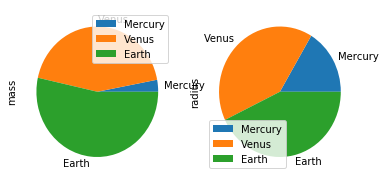

In [281]:
plot = df.plot.pie(subplots=True, figsize=(6, 3))

# 8

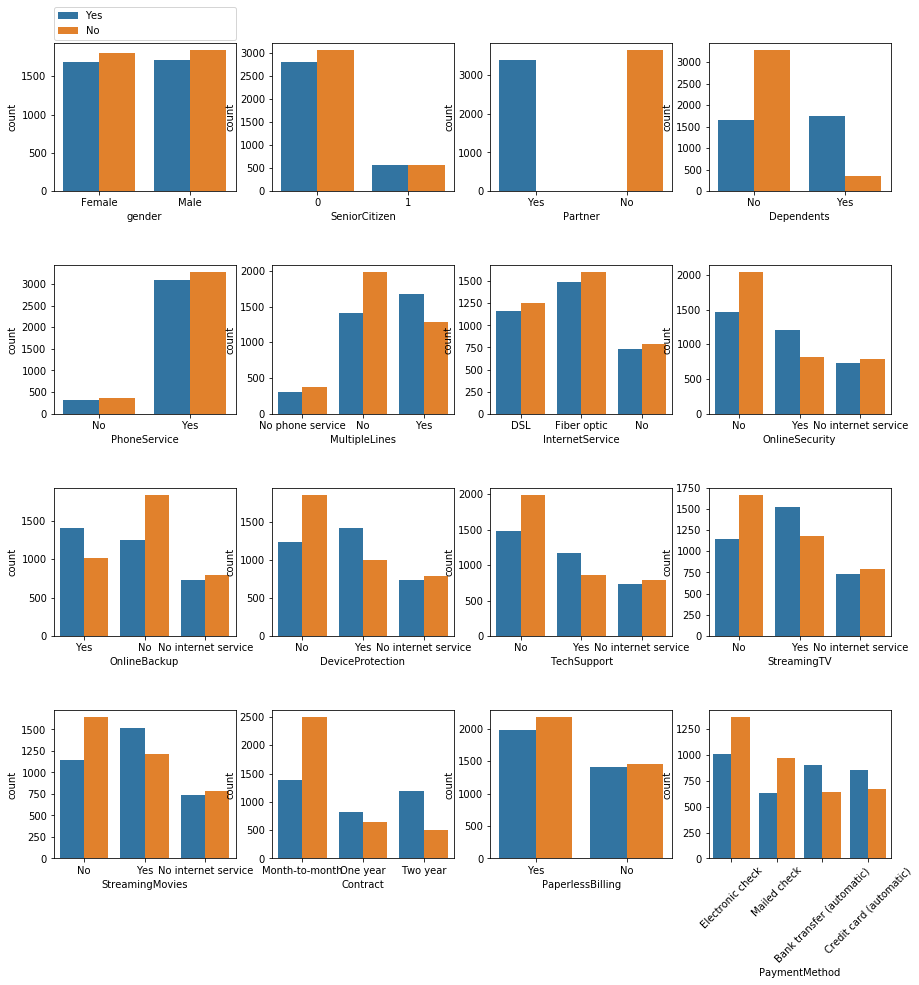

In [282]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds['Partner'], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

In [283]:
dataset["TechSupport"].value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [284]:
dpd_5 = data5["Dependents"].value_counts()
PS_5 = data5["PhoneService"].value_counts()
ML_5 = data5["MultipleLines"].value_counts()
IS_5 = data5["InternetService"].value_counts()
OS_5 = data5["OnlineSecurity"].value_counts()
OB_5 = data5["OnlineBackup"].value_counts()
DP_5 = data5["DeviceProtection"].value_counts()
STV_5 = data5["StreamingTV"].value_counts()
SM_5 = data5["StreamingMovies"].value_counts()
Ct_5 = data5["Contract"].value_counts()
PB_5 = data5["PaperlessBilling"].value_counts()
PM_5 = data5["PaymentMethod"].value_counts()
print(dpd_5)
print(PS_5)
print(ML_5)
print(IS_5)
print(OS_5)
print(OB_5)
print(DP_5)
print(STV_5)
print(SM_5)
print(Ct_5)
print(PB_5)
print(PM_5)

No     1339
Yes     701
Name: Dependents, dtype: int64
Yes    1753
No      287
Name: PhoneService, dtype: int64
Yes                 1019
No                   734
No phone service     287
Name: MultipleLines, dtype: int64
DSL            1174
Fiber optic     866
Name: InternetService, dtype: int64
Yes    1096
No      944
Name: OnlineSecurity, dtype: int64
Yes    1149
No      891
Name: OnlineBackup, dtype: int64
Yes    1206
No      834
Name: DeviceProtection, dtype: int64
Yes    1215
No      825
Name: StreamingTV, dtype: int64
Yes    1228
No      812
Name: StreamingMovies, dtype: int64
Two year          817
Month-to-month    671
One year          552
Name: Contract, dtype: int64
Yes    1268
No      772
Name: PaperlessBilling, dtype: int64
Credit card (automatic)      595
Bank transfer (automatic)    580
Electronic check             513
Mailed check                 352
Name: PaymentMethod, dtype: int64


In [285]:
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


# 9

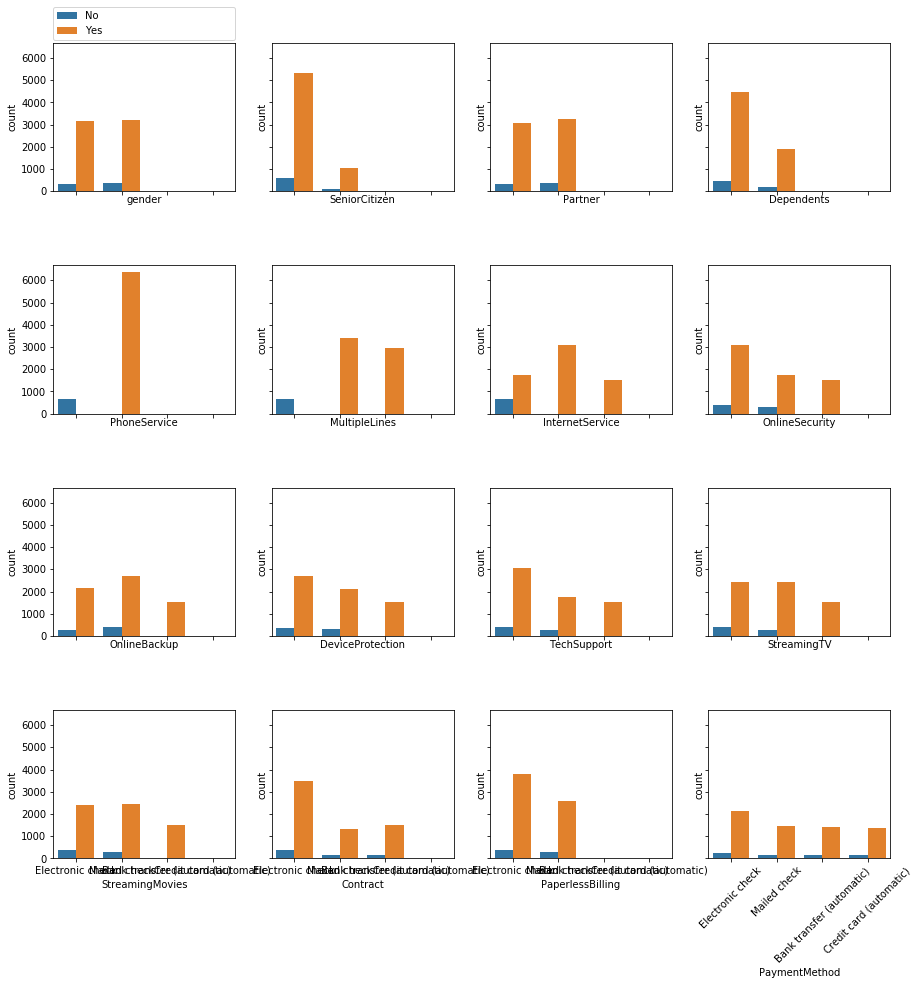

In [286]:
fig,ax =plt.subplots(4,4,figsize=(15,15),sharex=True, sharey=True)
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds['PhoneService'], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

# 6

In [287]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [288]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

ValueError: Could not interpret input 'Churn'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formate='retina' # ความละเอียดระดับ retina

In [ ]:
print(f"pandas version = {pd.__version__}")
print(f"seaborn version = {sns.__version__}")

In [ ]:
dexp = pd.read_csv('https://github.com/prasertcbs/tutorial/raw/master/mpg.csv')
dexp.head()

In [ ]:
sns.distplot(dexp['displ']);

In [ ]:
sns.distplot(dexp['hwy']);

In [ ]:
sns.jointplot(data=dexp, x='displ', y= 'hwy'); # ค่า p ที่ออกมามีค่าน้อยแสดงว่าตัวแปรมีความสัมพันธ์กัน

/Users/parinyaduangklang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/parinyaduangklang/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


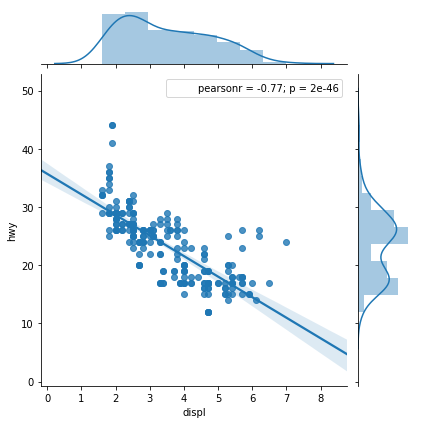

In [289]:
sns.jointplot(data=dexp, x='displ', y= 'hwy', kind='reg')

# Graphical Analysis
#### This gives us an idea of how our data looks like, now we will dive into the graphics that will help us understand better our variables and how do they relate with each other.

### Numerical

##### In this part we will look into our numerical variables, how they are distributed, how they relate with each other and how they can help us to predict the ‘Churn’ variable.

[]

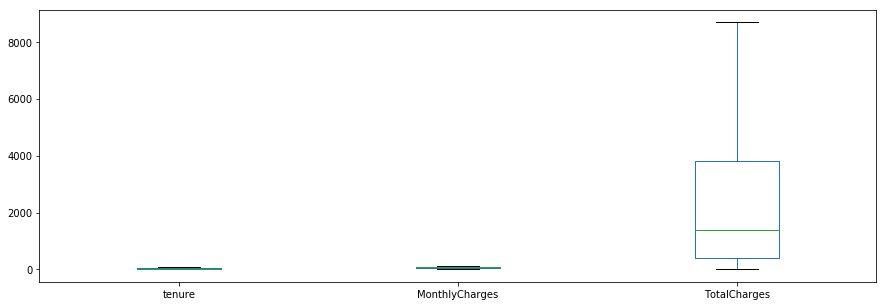

In [290]:
# box plots
# numeric_ds.plot(kind='box'==True,figsize=(15,5))
# plt.plot()

numeric_ds.plot(kind = 'box',figsize=(15,5))
plt.plot()

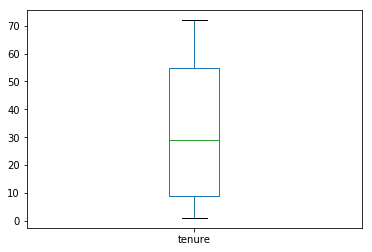

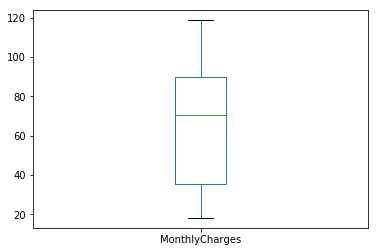

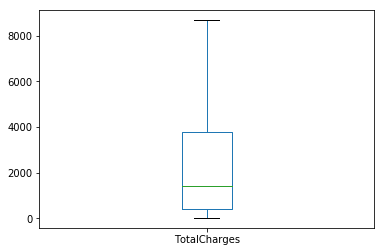

In [291]:
# data = np.random.randn(25, 4)
df_tenure = pd.DataFrame(data = numeric_ds["tenure"])
tenure_box = df_tenure.plot.box()

df_MonthlyCharges = pd.DataFrame(data = numeric_ds["MonthlyCharges"])
MonthlyCharges_box = df_MonthlyCharges.plot.box()

df_TotalCharges = pd.DataFrame(data = numeric_ds["TotalCharges"])
TotalCharges_box = df_TotalCharges.plot.box()

[]

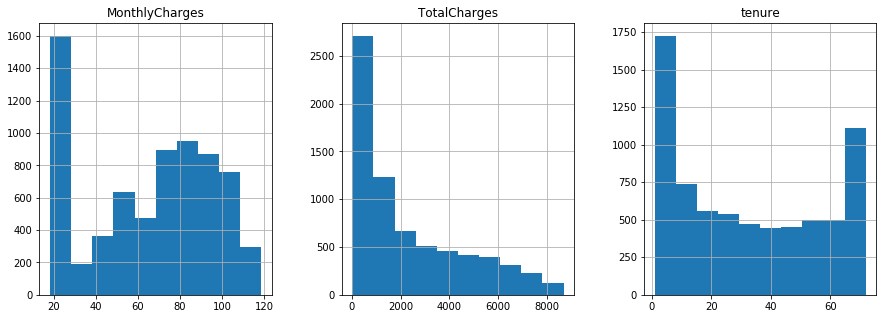

In [292]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

#####  The box plot and histogram shows us that our numerical variables are not normally distributed, I will check how they relate to the variable we are trying to predict and aggregate those variable in bins.


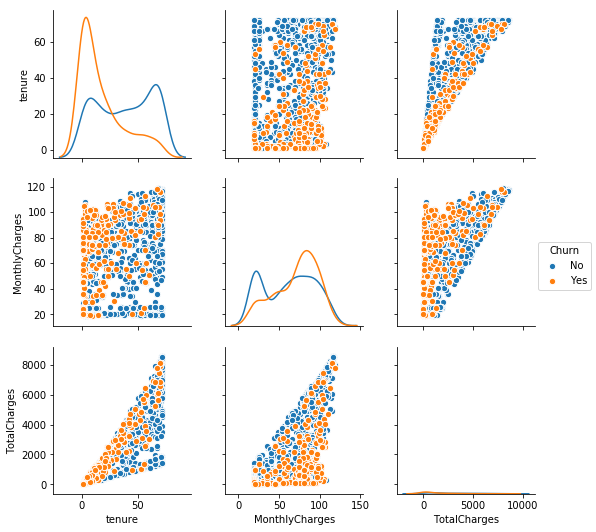

In [293]:
 numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) 
    #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

# 8

In [294]:
fc[fc.InternetService == 'Fiber optic']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No
50,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No
53,Female,1,Yes,No,8,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),80.65,633.30,Yes
75,Female,1,No,No,56,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,Yes,One year,No,Electronic check,110.50,6139.50,No
99,Female,1,Yes,No,25,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.50,2514.50,Yes
113,Female,1,Yes,No,37,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.50,2868.15,Yes
126,Female,1,No,No,27,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,78.05,2135.50,Yes
139,Female,1,Yes,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.45,70.45,Yes
176,Female,1,No,No,15,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.45,1145.70,Yes
177,Female,1,No,No,7,Yes,No,Fiber optic,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),76.45,503.60,Yes


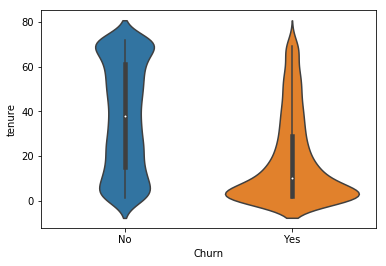

In [295]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

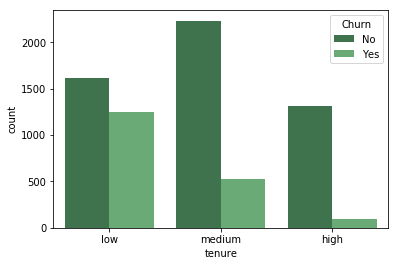

In [296]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

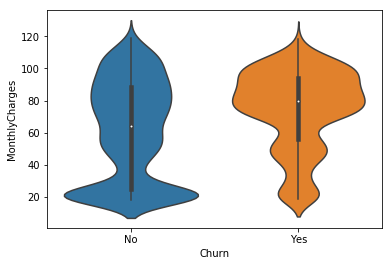

In [297]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

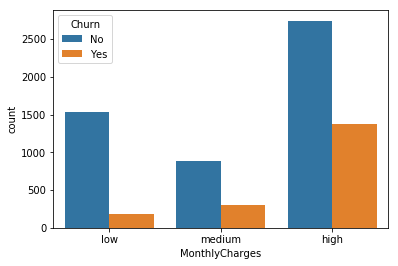

In [298]:
# MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
# sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130],labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds);

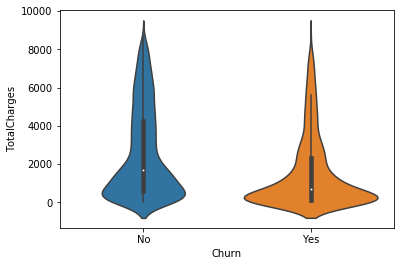

In [299]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

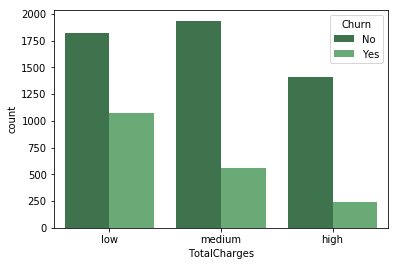

In [300]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

In [301]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T
bins.head()

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low


# Machine Learning Models

##### In this part I will build the machine learning models to predict the ‘Churn’ variable based on the clients features for that I first need to manipulate the data frame so it I can build the models with it.

In [317]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables

## Split Train and Test

In [318]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [319]:
scoring = 'accuracy'
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K-Neighbors Classifier', KNeighborsClassifier()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Gaussian NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

Logistic Regression: 0.801516 (0.011831)
K-Neighbors Classifier: 0.762958 (0.009923)
Decision Tree Classifier: 0.723923 (0.009614)
Gaussian NB: 0.704493 (0.016043)


[]

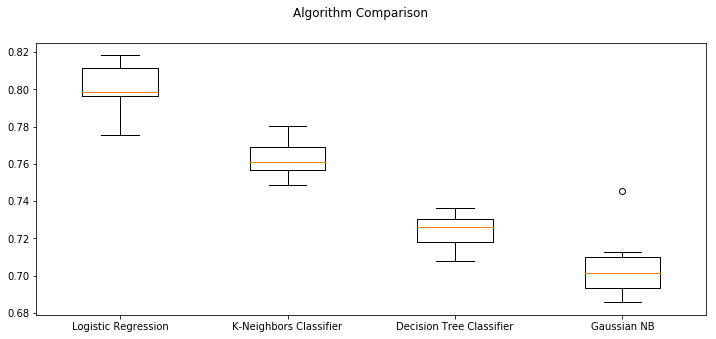

In [320]:
# Compare Algorithms
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

In [321]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7883522727272727
[[457  50]
 [ 99  98]]
             precision    recall  f1-score   support

          0       0.82      0.90      0.86       507
          1       0.66      0.50      0.57       197

avg / total       0.78      0.79      0.78       704



In [322]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp.head(5))
display(df_imp.tail(5))

,importance,labels
43,0.355405,Contract_Month-to-month
23,0.290686,InternetService_Fiber optic
1,0.227804,tenure_low
7,0.158818,TotalCharges_low
50,0.110047,PaymentMethod_Electronic check


,importance,labels
46,-0.149331,PaperlessBilling_No
3,-0.203107,MonthlyCharges_high
0,-0.227098,tenure_high
22,-0.292548,InternetService_DSL
45,-0.382415,Contract_Two year


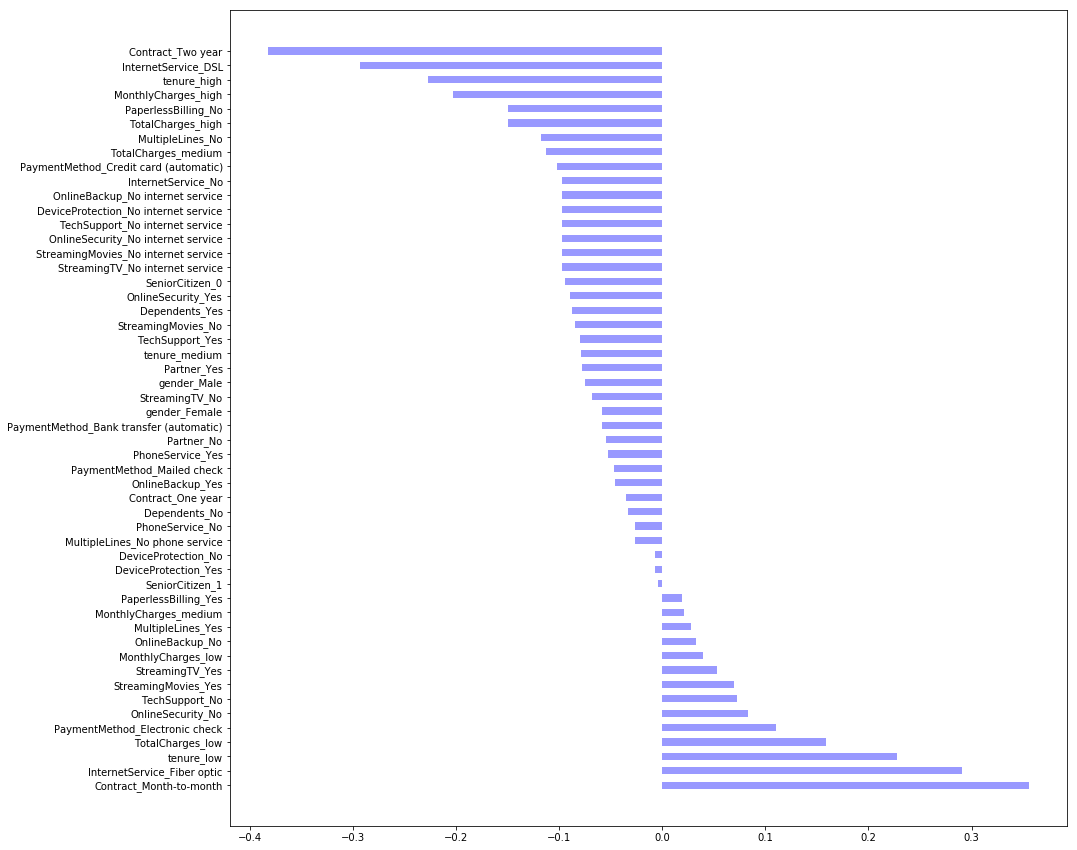

In [323]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()